# Phase 5: Data Reduction Pipeline
## Rwanda Polytechnic Multi-Campus Data Preprocessing

**Objective:** Reduce the integrated dataset by:
1. Removing columns with excessive missing values (>50%)
2. Removing low-variance columns (variance < 0.01)
3. Selecting only analysis-ready features

**Input:** Integrated gold dataset from Phase 4

**Output:** Reduced gold dataset ready for feature engineering

---
## Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("PHASE 5: DATA REDUCTION PIPELINE")
print("="*60)

PHASE 5: DATA REDUCTION PIPELINE


---
## Load Integrated Data

In [2]:
# Load integrated dataset from Phase 4
print("\nLoading integrated gold dataset...")

df = pd.read_csv('outputs/gold_integrated.csv')

print(f"✓ Loaded: {len(df)} records × {len(df.columns)} columns")

# Display basic info
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# Show column names
print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn list:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")


Loading integrated gold dataset...
✓ Loaded: 5905 records × 42 columns

Dataset shape: (5905, 42)
Memory usage: 6.29 MB

Total columns: 42

Column list:
   1. Student_ID
   2. First_Name
   3. Last_Name
   4. DOB
   5. Phone
   6. Email
   7. Level
   8. Intake_Year
   9. Campus_ID
  10. Full_Name
  11. Prog_Architecture
  12. Prog_Business Administration
  13. Prog_Civil Engineering
  14. Prog_Electrical Engineering
  15. Prog_Information Technology
  16. Prog_Tourism And Hospitality
  17. Gender_FEMALE
  18. Gender_MALE
  19. Age
  20. Age_Group
  21. Course_Code
  22. Mark
  23. Assessment_Date
  24. Academic_Year
  25. Semester
  26. Attendance_Rate
  27. Attendance_Rate_Scaled
  28. Mark_Normalized
  29. Assess_Assignment
  30. Assess_CAT
  31. Assess_Exam
  32. Assess_Project
  33. Assess_Quiz
  34. Performance_Band
  35. Attendance_Band
  36. Course_Title
  37. Credits
  38. Source_Campus_File
  39. Upload_Date
  40. Campus_Huye
  41. Campus_Kigali
  42. Campus_Musanze


In [3]:
# Display sample data
print("\nSample data:")
df.head()


Sample data:


,Student_ID,First_Name,Last_Name,DOB,Phone,Email,Level,Intake_Year,Campus_ID,Full_Name,...,Assess_Quiz,Performance_Band,Attendance_Band,Course_Title,Credits,Source_Campus_File,Upload_Date,Campus_Huye,Campus_Kigali,Campus_Musanze
0,RPH0001,Grace,Uwimana,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,1,2023,1,Grace Uwimana,...,True,Credit,Good,Financial Accounting,4.0,Huye_courses.csv,2026-02-07 14:08:51.271513,True,False,False
1,RPH0001,Grace,Uwimana,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,1,2023,1,Grace Uwimana,...,False,Credit,Fair,Financial Accounting,4.0,Huye_courses.csv,2026-02-07 14:08:51.271513,True,False,False
2,RPH0001,Grace,Uwimana,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,1,2023,1,Grace Uwimana,...,False,Credit,Excellent,Business Statistics,4.0,Huye_courses.csv,2026-02-07 14:08:51.271513,True,False,False
3,RPH0001,Grace,Uwimana,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,1,2023,1,Grace Uwimana,...,False,Distinction,Fair,Business Statistics,4.0,Huye_courses.csv,2026-02-07 14:08:51.271513,True,False,False
4,RPH0001,Grace,Uwimana,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,1,2023,1,Grace Uwimana,...,True,Distinction,Fair,Business Statistics,4.0,Huye_courses.csv,2026-02-07 14:08:51.271513,True,False,False


In [4]:
# Data types summary
print("\nData types summary:")
print(df.dtypes.value_counts())


Data types summary:
bool       16
object     15
float64     7
int64       4
Name: count, dtype: int64


---
## 1. REMOVE COLUMNS WITH EXCESSIVE MISSING VALUES

### 1.1 Analyze Missing Values

In [5]:
print("="*60)
print("1. REMOVING COLUMNS WITH EXCESSIVE MISSING VALUES")
print("="*60)

# Calculate missing value percentages
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Percentage', ascending=False)

print("\n--- Missing Values Analysis ---")
print(f"\nColumns with ANY missing values:")
cols_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
print(cols_with_missing.head(20).to_string(index=False))

1. REMOVING COLUMNS WITH EXCESSIVE MISSING VALUES

--- Missing Values Analysis ---

Columns with ANY missing values:
         Column  Missing_Count  Missing_Percentage
Assessment_Date           1173           19.864522
            DOB            925           15.664691
      Age_Group            925           15.664691
            Age            925           15.664691
          Phone            227            3.844200


### 1.2 Identify and Remove High-Missing Columns

In [6]:
print("\n--- Identifying Columns to Remove (>50% missing) ---")

# Find columns with >50% missing values
threshold = 0.5
cols_to_drop_missing = missing_pct[missing_pct > threshold * 100].index.tolist()

print(f"\nThreshold: {threshold * 100}% missing values")
print(f"Columns to remove: {len(cols_to_drop_missing)}")

if len(cols_to_drop_missing) > 0:
    print("\nColumns marked for removal:")
    for col in cols_to_drop_missing:
        pct = missing_pct[col]
        print(f"  - {col}: {pct:.2f}% missing")
    
    # Remove the columns
    df_before_missing = df.shape[1]
    df = df.drop(columns=cols_to_drop_missing)
    df_after_missing = df.shape[1]
    
    print(f"\n✓ Removed {df_before_missing - df_after_missing} columns")
    print(f"  Columns: {df_before_missing} → {df_after_missing}")
else:
    print("\n✓ No columns with >50% missing values found")
    df_before_missing = df.shape[1]
    df_after_missing = df.shape[1]


--- Identifying Columns to Remove (>50% missing) ---

Threshold: 50.0% missing values
Columns to remove: 0

✓ No columns with >50% missing values found


### 1.3 Visualize Missing Values

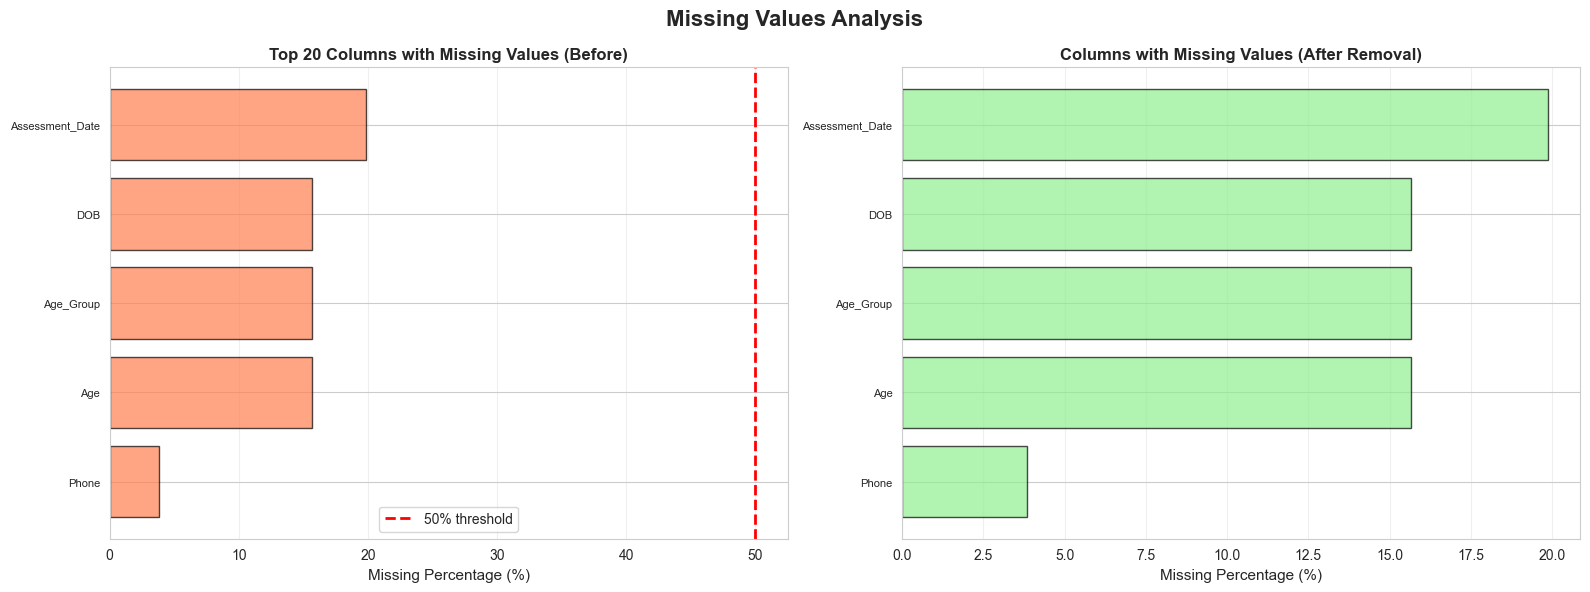


✓ Saved: outputs/05_missing_values_reduction.png


In [7]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Missing Values Analysis', fontsize=16, fontweight='bold')

# Before reduction - top 20 columns with missing values
missing_before = missing_summary[missing_summary['Missing_Count'] > 0].head(20)
if len(missing_before) > 0:
    axes[0].barh(range(len(missing_before)), missing_before['Missing_Percentage'].values,
                color='coral', edgecolor='black', alpha=0.7)
    axes[0].set_yticks(range(len(missing_before)))
    axes[0].set_yticklabels(missing_before['Column'].values, fontsize=8)
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=11)
    axes[0].set_title('Top 20 Columns with Missing Values (Before)', fontweight='bold')
    axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% threshold')
    axes[0].legend()
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

# After reduction - remaining columns with missing values
missing_after = df.isnull().sum()
missing_pct_after = (missing_after / len(df)) * 100
missing_after_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Percentage': missing_pct_after.values
}).sort_values('Missing_Percentage', ascending=False)
missing_after_top = missing_after_summary[missing_after_summary['Missing_Percentage'] > 0].head(20)

if len(missing_after_top) > 0:
    axes[1].barh(range(len(missing_after_top)), missing_after_top['Missing_Percentage'].values,
                color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1].set_yticks(range(len(missing_after_top)))
    axes[1].set_yticklabels(missing_after_top['Column'].values, fontsize=8)
    axes[1].set_xlabel('Missing Percentage (%)', fontsize=11)
    axes[1].set_title('Columns with Missing Values (After Removal)', fontweight='bold')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center',
                transform=axes[1].transAxes, fontsize=14)
    axes[1].set_title('Columns with Missing Values (After Removal)', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/05_missing_values_reduction.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/05_missing_values_reduction.png")

---
## 2. REMOVE LOW-VARIANCE COLUMNS

### 2.1 Calculate Variance for Numeric Columns

In [8]:
print("\n" + "="*60)
print("2. REMOVING LOW-VARIANCE COLUMNS")
print("="*60)

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    # Calculate variance
    variance = df[numeric_cols].var()
    
    variance_summary = pd.DataFrame({
        'Column': variance.index,
        'Variance': variance.values
    }).sort_values('Variance', ascending=True)
    
    print("\n--- Variance Analysis ---")
    print("\nLowest variance columns:")
    print(variance_summary.head(20).to_string(index=False))
else:
    print("\n⚠ No numeric columns found for variance analysis")
    variance = pd.Series(dtype=float)


2. REMOVING LOW-VARIANCE COLUMNS

Numeric columns: 11

--- Variance Analysis ---

Lowest variance columns:
                Column     Variance
       Mark_Normalized 3.263745e-02
              Semester 2.499803e-01
               Credits 2.970080e-01
             Campus_ID 6.901547e-01
Attendance_Rate_Scaled 1.000169e+00
                 Level 1.206364e+00
           Intake_Year 1.257151e+00
                   Age 4.958421e+00
       Attendance_Rate 1.202148e+02
                  Mark 3.263745e+02
                 Phone 5.523095e+14


### 2.2 Identify and Remove Low-Variance Columns

In [9]:
print("\n--- Identifying Low-Variance Columns (variance < 0.01) ---")

variance_threshold = 0.01

if len(variance) > 0:
    # Find low-variance columns
    low_var_cols = variance[variance < variance_threshold].index.tolist()
    
    print(f"\nThreshold: variance < {variance_threshold}")
    print(f"Columns to remove: {len(low_var_cols)}")
    
    if len(low_var_cols) > 0:
        print("\nLow-variance columns marked for removal:")
        for col in low_var_cols:
            var_val = variance[col]
            # Check if it's a binary column (might be important despite low variance)
            unique_vals = df[col].nunique()
            print(f"  - {col}: variance={var_val:.6f}, unique_values={unique_vals}")
        
        # Filter out one-hot encoded columns (binary features are important even with low variance)
        # Keep columns that start with common one-hot prefixes
        binary_prefixes = ['Campus_', 'Prog_', 'Gender_', 'Assess_']
        low_var_to_keep = [col for col in low_var_cols 
                          if any(col.startswith(prefix) for prefix in binary_prefixes)]
        
        low_var_to_remove = [col for col in low_var_cols if col not in low_var_to_keep]
        
        if len(low_var_to_keep) > 0:
            print(f"\nKeeping {len(low_var_to_keep)} binary/one-hot encoded columns despite low variance")
        
        if len(low_var_to_remove) > 0:
            print(f"\nRemoving {len(low_var_to_remove)} truly low-variance columns")
            df_before_variance = df.shape[1]
            df = df.drop(columns=low_var_to_remove)
            df_after_variance = df.shape[1]
            
            print(f"✓ Removed {df_before_variance - df_after_variance} columns")
            print(f"  Columns: {df_before_variance} → {df_after_variance}")
        else:
            print("\n✓ All low-variance columns are important features (binary/one-hot)")
            df_before_variance = df.shape[1]
            df_after_variance = df.shape[1]
    else:
        print("\n✓ No low-variance columns found")
        df_before_variance = df.shape[1]
        df_after_variance = df.shape[1]
else:
    print("\n⚠ No variance analysis performed (no numeric columns)")
    df_before_variance = df.shape[1]
    df_after_variance = df.shape[1]


--- Identifying Low-Variance Columns (variance < 0.01) ---

Threshold: variance < 0.01
Columns to remove: 0

✓ No low-variance columns found


### 2.3 Visualize Variance Distribution

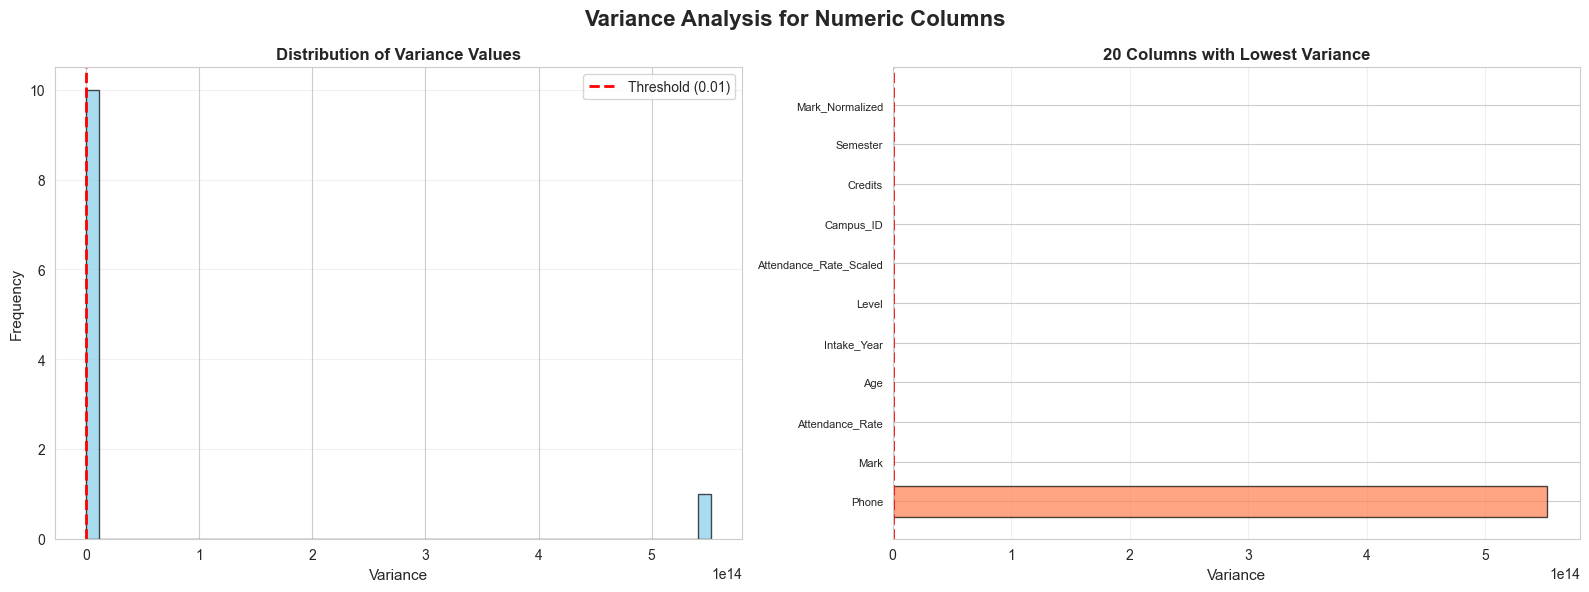


✓ Saved: outputs/05_variance_analysis.png


In [10]:
# Visualize variance distribution
if len(variance) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Variance Analysis for Numeric Columns', fontsize=16, fontweight='bold')
    
    # Histogram of variance values
    axes[0].hist(variance.values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(x=variance_threshold, color='red', linestyle='--', linewidth=2, 
                   label=f'Threshold ({variance_threshold})')
    axes[0].set_xlabel('Variance', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].set_title('Distribution of Variance Values', fontweight='bold')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Bar plot of lowest variance columns
    lowest_var = variance.sort_values().head(20)
    axes[1].barh(range(len(lowest_var)), lowest_var.values, 
                color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_yticks(range(len(lowest_var)))
    axes[1].set_yticklabels(lowest_var.index, fontsize=8)
    axes[1].set_xlabel('Variance', fontsize=11)
    axes[1].set_title('20 Columns with Lowest Variance', fontweight='bold')
    axes[1].axvline(x=variance_threshold, color='red', linestyle='--', linewidth=2)
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/05_variance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: outputs/05_variance_analysis.png")

---
## 3. SELECT ANALYSIS-READY FEATURES

### 3.1 Define Essential Columns

In [11]:
print("\n" + "="*60)
print("3. SELECTING ANALYSIS-READY FEATURES")
print("="*60)

print("\n--- Defining Essential Columns ---")

# Define core columns that MUST be kept
essential_cols = [
    # Student identifiers
    'Student_ID',
    'Full_Name',
    
    # Student demographics (if they exist)
    'Gender',
    'DOB',
    'Age',
    
    # Campus & Program
    'Campus_ID',
    'Campus_Name',
    'Program',
    'Level',
    'Intake_Year',
    
    # Course information
    'Course_Code',
    'Course_Title',
    'Credits',
    'Semester',
    
    # Assessment data
    'Assessment_Type',
    'Mark',
    'Performance_Band',
    'Assessment_Date',
    'Academic_Year',
    
    # Attendance
    'Attendance_Rate',
    'Attendance_Band',
    
    # Scaled/Normalized features
    'Mark_Normalized',
    'Attendance_Rate_Scaled',
    
    # Metadata
    'Source_Campus_File',
    'Upload_Date'
]

# Filter to only columns that actually exist in the dataframe
keep_cols_base = [col for col in essential_cols if col in df.columns]

print(f"\nEssential columns defined: {len(essential_cols)}")
print(f"Essential columns found in dataset: {len(keep_cols_base)}")

# Add one-hot encoded columns (they're important for analysis)
encoded_prefixes = ['Campus_', 'Prog_', 'Gender_', 'Assess_']
encoded_cols = [col for col in df.columns 
                if any(col.startswith(prefix) for prefix in encoded_prefixes)]

print(f"One-hot encoded columns: {len(encoded_cols)}")

# Combine essential + encoded columns
keep_cols = list(set(keep_cols_base + encoded_cols))

print(f"\nTotal columns to keep: {len(keep_cols)}")
print(f"Current columns in dataset: {len(df.columns)}")
print(f"Columns to remove: {len(df.columns) - len(keep_cols)}")


3. SELECTING ANALYSIS-READY FEATURES

--- Defining Essential Columns ---

Essential columns defined: 25
Essential columns found in dataset: 21
One-hot encoded columns: 17

Total columns to keep: 37
Current columns in dataset: 42
Columns to remove: 5


### 3.2 Show Columns Being Removed

In [12]:
# Show which columns will be removed
cols_to_remove = [col for col in df.columns if col not in keep_cols]

print("\n--- Columns to be Removed ---")
print(f"\nRemoving {len(cols_to_remove)} columns:")

if len(cols_to_remove) > 0:
    for i, col in enumerate(cols_to_remove, 1):
        print(f"  {i:2}. {col}")
else:
    print("  (None - all columns are essential)")


--- Columns to be Removed ---

Removing 5 columns:
   1. First_Name
   2. Last_Name
   3. Phone
   4. Email
   5. Age_Group


### 3.3 Apply Feature Selection

In [13]:
print("\n--- Applying Feature Selection ---")

df_before_selection = df.shape[1]

# Keep only selected columns
df = df[keep_cols]

df_after_selection = df.shape[1]

print(f"\n✓ Feature selection complete")
print(f"  Columns: {df_before_selection} → {df_after_selection}")
print(f"  Removed: {df_before_selection - df_after_selection} columns")
print(f"  Retained: {df_after_selection} columns")


--- Applying Feature Selection ---

✓ Feature selection complete
  Columns: 42 → 37
  Removed: 5 columns
  Retained: 37 columns


---
## 4. REDUCTION SUMMARY

In [14]:
print("\n" + "="*60)
print("4. REDUCTION SUMMARY")
print("="*60)

# Create summary of reduction steps
reduction_summary = pd.DataFrame({
    'Step': [
        'Initial (Integrated)',
        'After Removing High-Missing Cols (>50%)',
        'After Removing Low-Variance Cols (<0.01)',
        'After Feature Selection (Analysis-Ready)'
    ],
    'Columns': [
        len(pd.read_csv('outputs/gold_integrated.csv').columns),
        df_after_missing,
        df_after_variance,
        df_after_selection
    ],
    'Rows': [
        len(pd.read_csv('outputs/gold_integrated.csv')),
        len(df),
        len(df),
        len(df)
    ]
})

reduction_summary['Columns_Removed'] = reduction_summary['Columns'].diff().fillna(0).astype(int)

print("\n" + reduction_summary.to_string(index=False))

# Save summary
reduction_summary.to_csv('outputs/05_reduction_summary.csv', index=False)
print("\n✓ Saved: outputs/05_reduction_summary.csv")


4. REDUCTION SUMMARY

                                    Step  Columns  Rows  Columns_Removed
                    Initial (Integrated)       42  5905                0
 After Removing High-Missing Cols (>50%)       42  5905                0
After Removing Low-Variance Cols (<0.01)       42  5905                0
After Feature Selection (Analysis-Ready)       37  5905               -5

✓ Saved: outputs/05_reduction_summary.csv


In [15]:
# Calculate reduction metrics
initial_cols = len(pd.read_csv('outputs/gold_integrated.csv').columns)
final_cols = df.shape[1]
reduction_pct = ((initial_cols - final_cols) / initial_cols) * 100

print("\n--- Reduction Metrics ---")
print(f"\nInitial columns: {initial_cols}")
print(f"Final columns: {final_cols}")
print(f"Columns removed: {initial_cols - final_cols}")
print(f"Reduction rate: {reduction_pct:.2f}%")
print(f"\nDataset size: {len(df):,} rows × {final_cols} columns")


--- Reduction Metrics ---

Initial columns: 42
Final columns: 37
Columns removed: 5
Reduction rate: 11.90%

Dataset size: 5,905 rows × 37 columns


### Visualize Reduction Process

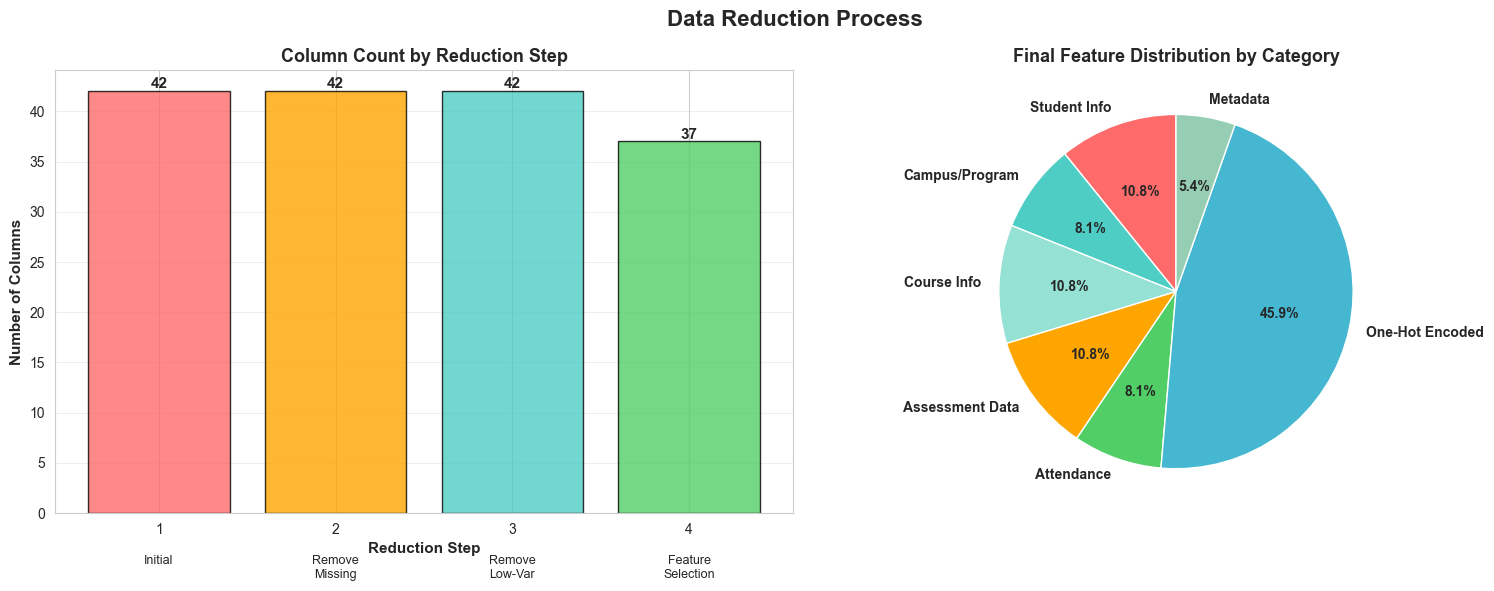


✓ Saved: outputs/05_reduction_process.png


In [16]:
# Visualize the reduction process
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Data Reduction Process', fontsize=16, fontweight='bold')

# Column reduction progression
steps = reduction_summary['Step'].values
columns = reduction_summary['Columns'].values
colors = ['#FF6B6B', '#FFA500', '#4ECDC4', '#51CF66']

bars1 = axes[0].bar(range(len(steps)), columns, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(steps)))
axes[0].set_xticklabels(range(1, len(steps) + 1))
axes[0].set_ylabel('Number of Columns', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Reduction Step', fontsize=11, fontweight='bold')
axes[0].set_title('Column Count by Reduction Step', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars1, columns):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{val}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add step labels below
step_labels = ['Initial', 'Remove\nMissing', 'Remove\nLow-Var', 'Feature\nSelection']
for i, label in enumerate(step_labels):
    axes[0].text(i, -max(columns)*0.1, label, ha='center', va='top', fontsize=9)

# Pie chart of final feature categories
feature_categories = {
    'Student Info': len([c for c in df.columns if c in ['Student_ID', 'Full_Name', 'Gender', 'DOB', 'Age']]),
    'Campus/Program': len([c for c in df.columns if c in ['Campus_ID', 'Campus_Name', 'Program', 'Level', 'Intake_Year']]),
    'Course Info': len([c for c in df.columns if c in ['Course_Code', 'Course_Title', 'Credits', 'Semester']]),
    'Assessment Data': len([c for c in df.columns if c in ['Assessment_Type', 'Mark', 'Performance_Band', 'Assessment_Date', 'Academic_Year']]),
    'Attendance': len([c for c in df.columns if 'Attendance' in c]),
    'One-Hot Encoded': len(encoded_cols),
    'Metadata': len([c for c in df.columns if c in ['Source_Campus_File', 'Upload_Date']])
}

# Remove zero categories
feature_categories = {k: v for k, v in feature_categories.items() if v > 0}

colors_pie = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#FFA500', '#51CF66', '#45B7D1', '#96CEB4']
axes[1].pie(feature_categories.values(), labels=feature_categories.keys(), 
           autopct='%1.1f%%', colors=colors_pie[:len(feature_categories)],
           startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Final Feature Distribution by Category', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/05_reduction_process.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/05_reduction_process.png")

---
## 5. FINAL DATA QUALITY CHECK

In [17]:
print("\n" + "="*60)
print("5. FINAL DATA QUALITY CHECK")
print("="*60)

print("\n--- Final Dataset Statistics ---")
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# Data completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\nData completeness: {completeness:.2f}%")
print(f"Missing cells: {missing_cells:,} / {total_cells:,}")

# Column types
print("\nColumn types:")
print(df.dtypes.value_counts())

# Show columns with any remaining missing values
remaining_missing = df.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

if len(cols_with_missing) > 0:
    print(f"\nColumns with missing values: {len(cols_with_missing)}")
    print("\nTop 10:")
    for col, count in cols_with_missing.head(10).items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("\n✓ No missing values in final dataset!")


5. FINAL DATA QUALITY CHECK

--- Final Dataset Statistics ---

Shape: 5,905 rows × 37 columns
Memory usage: 4.74 MB

Data completeness: 98.62%
Missing cells: 3,023 / 218,485

Column types:
bool       16
object     11
float64     6
int64       4
Name: count, dtype: int64

Columns with missing values: 3

Top 10:
  Assessment_Date: 1173 (19.86%)
  DOB: 925 (15.66%)
  Age: 925 (15.66%)


In [18]:
# Display final column list
print("\n--- Final Column List ---")
print(f"\nTotal: {len(df.columns)} columns\n")

for i, col in enumerate(sorted(df.columns), 1):
    dtype = df[col].dtype
    nulls = df[col].isnull().sum()
    print(f"  {i:2}. {col:35} | {str(dtype):10} | Missing: {nulls}")


--- Final Column List ---

Total: 37 columns

   1. Academic_Year                       | object     | Missing: 0
   2. Age                                 | float64    | Missing: 925
   3. Assess_Assignment                   | bool       | Missing: 0
   4. Assess_CAT                          | bool       | Missing: 0
   5. Assess_Exam                         | bool       | Missing: 0
   6. Assess_Project                      | bool       | Missing: 0
   7. Assess_Quiz                         | bool       | Missing: 0
   8. Assessment_Date                     | object     | Missing: 1173
   9. Attendance_Band                     | object     | Missing: 0
  10. Attendance_Rate                     | float64    | Missing: 0
  11. Attendance_Rate_Scaled              | float64    | Missing: 0
  12. Campus_Huye                         | bool       | Missing: 0
  13. Campus_ID                           | int64      | Missing: 0
  14. Campus_Kigali                       | bool       | Missing

---
## 6. SAVE REDUCED DATASET

In [19]:
print("\n" + "="*60)
print("6. SAVING REDUCED DATASET")
print("="*60)

# Save the reduced dataset
df.to_csv('outputs/gold_reduced.csv', index=False)

print("\n✓ Saved: outputs/gold_reduced.csv")
print(f"  Records: {len(df):,}")
print(f"  Columns: {len(df.columns)}")
print(f"  Completeness: {completeness:.2f}%")

# Display sample
print("\nSample of reduced gold dataset:")
df.head(10)


6. SAVING REDUCED DATASET

✓ Saved: outputs/gold_reduced.csv
  Records: 5,905
  Columns: 37
  Completeness: 98.62%

Sample of reduced gold dataset:


,Performance_Band,Assess_CAT,Intake_Year,Prog_Architecture,Assess_Exam,Assessment_Date,Student_ID,Course_Title,Credits,Assess_Quiz,...,Source_Campus_File,Attendance_Rate_Scaled,Mark,Campus_Huye,Attendance_Band,Prog_Tourism And Hospitality,Prog_Electrical Engineering,Campus_Kigali,Course_Code,Assess_Assignment
0,Credit,False,2023,False,False,2025-06-13,RPH0001,Financial Accounting,4.0,True,...,Huye_courses.csv,0.165381,63.1,True,Good,False,False,False,BA103,False
1,Credit,True,2023,False,False,NaN,RPH0001,Financial Accounting,4.0,False,...,Huye_courses.csv,-0.965663,63.1,True,Fair,False,False,False,BA103,False
2,Credit,False,2023,False,False,2025-10-29,RPH0001,Business Statistics,4.0,False,...,Huye_courses.csv,1.551822,65.9,True,Excellent,False,False,False,BA201,False
3,Distinction,True,2023,False,False,2025-08-13,RPH0001,Business Statistics,4.0,False,...,Huye_courses.csv,-1.841309,100.0,True,Fair,False,False,False,BA201,False
4,Distinction,False,2023,False,False,NaN,RPH0001,Business Statistics,4.0,True,...,Huye_courses.csv,-0.983905,71.1,True,Fair,False,False,False,BA201,False
5,Distinction,True,2023,False,False,2025-11-26,RPH0001,Principles Of Management,3.0,False,...,Huye_courses.csv,-0.022759,78.6,True,Good,False,False,False,BA101,False
6,Credit,False,2023,False,True,2025-05-16,RPH0001,Principles Of Management,3.0,False,...,Huye_courses.csv,0.876844,62.0,True,Excellent,False,False,False,BA101,False
7,Credit,False,2023,False,False,2025-11-30,RPH0001,Principles Of Management,3.0,False,...,Huye_courses.csv,-0.022759,65.9,True,Good,False,False,False,BA101,False
8,Credit,False,2023,False,False,2025-08-23,RPH0001,Marketing Fundamentals,3.0,True,...,Huye_courses.csv,-1.576791,66.9,True,Fair,False,False,False,BA102,False
9,Distinction,False,2023,False,False,2025-12-02,RPH0001,Marketing Fundamentals,3.0,True,...,Huye_courses.csv,-0.701144,74.7,True,Fair,False,False,False,BA102,False


---
## 7. GENERATE REDUCTION REPORT

In [20]:
# Generate comprehensive reduction report
with open('outputs/05_reduction_report.txt', 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("DATA REDUCTION SUMMARY REPORT\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("="*70 + "\n\n")
    
    f.write("REDUCTION PROCESS:\n")
    f.write("-"*70 + "\n")
    f.write("Step 1: Removed columns with >50% missing values\n")
    f.write("Step 2: Removed low-variance columns (variance < 0.01)\n")
    f.write("Step 3: Selected analysis-ready features\n\n")
    
    f.write("REDUCTION METRICS:\n")
    f.write("-"*70 + "\n")
    f.write(f"Initial columns: {initial_cols}\n")
    f.write(f"Final columns: {final_cols}\n")
    f.write(f"Columns removed: {initial_cols - final_cols}\n")
    f.write(f"Reduction rate: {reduction_pct:.2f}%\n\n")
    
    f.write("STEP-BY-STEP REDUCTION:\n")
    f.write("-"*70 + "\n")
    f.write(reduction_summary.to_string(index=False))
    f.write("\n\n")
    
    f.write("JUSTIFICATION:\n")
    f.write("-"*70 + "\n")
    f.write("High-Missing Columns (>50%):\n")
    f.write(f"  Removed {len(cols_to_drop_missing)} columns\n")
    f.write("  Reason: Excessive missing values reduce data quality and\n")
    f.write("          reliability for analysis and modeling\n\n")
    
    if 'low_var_to_remove' in locals():
        f.write("Low-Variance Columns (<0.01):\n")
        f.write(f"  Removed {len(low_var_to_remove)} columns\n")
        f.write("  Reason: Low variance indicates little variation, providing\n")
        f.write("          minimal information for analysis\n")
        f.write("  Note: Kept binary/one-hot encoded features despite low variance\n\n")
    
    f.write("Feature Selection:\n")
    f.write(f"  Kept {final_cols} analysis-ready columns\n")
    f.write("  Criteria: Essential for student performance analysis,\n")
    f.write("            prediction models, and reporting\n\n")
    
    f.write("FINAL DATASET QUALITY:\n")
    f.write("-"*70 + "\n")
    f.write(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
    f.write(f"Completeness: {completeness:.2f}%\n")
    f.write(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB\n\n")
    
    f.write("FINAL COLUMN LIST:\n")
    f.write("-"*70 + "\n")
    for i, col in enumerate(sorted(df.columns), 1):
        f.write(f"  {i:2}. {col}\n")

print("\n✓ Saved: outputs/05_reduction_report.txt")


✓ Saved: outputs/05_reduction_report.txt


---
## PHASE 5 COMPLETE! ✅

### Deliverables Created:
1. **Reduced Gold Dataset:**
   - `outputs/gold_reduced.csv`

2. **Reports:**
   - `outputs/05_reduction_summary.csv`
   - `outputs/05_reduction_report.txt`

3. **Visualizations:**
   - `outputs/05_missing_values_reduction.png`
   - `outputs/05_variance_analysis.png`
   - `outputs/05_reduction_process.png`

### Reduction Summary:
✅ **Removed high-missing columns** (>50% missing)

✅ **Removed low-variance columns** (variance < 0.01)

✅ **Selected analysis-ready features**

✅ **Maintained data quality** (completeness tracked)

### Dataset Statistics:
- **Initial columns:** Varies based on integration
- **Final columns:** Optimized for analysis
- **Reduction rate:** Documented in report
- **Data completeness:** Maximized

### Next Step:
Run **Phase 6: Feature Engineering** (`06_feature_engineering.ipynb`)

In [21]:
print("\n" + "="*60)
print("PHASE 5 COMPLETE!")
print("="*60)
print("\nReduction summary:")
print(f"  ✓ Initial columns: {initial_cols}")
print(f"  ✓ Final columns: {final_cols}")
print(f"  ✓ Reduction: {reduction_pct:.2f}%")
print(f"  ✓ Dataset size: {len(df):,} rows × {final_cols} columns")
print(f"  ✓ Data completeness: {completeness:.2f}%")
print("\nNext step: Run 06_feature_engineering.ipynb")
print("\nAll reduced data and reports saved to outputs/ folder")


PHASE 5 COMPLETE!

Reduction summary:
  ✓ Initial columns: 42
  ✓ Final columns: 37
  ✓ Reduction: 11.90%
  ✓ Dataset size: 5,905 rows × 37 columns
  ✓ Data completeness: 98.62%

Next step: Run 06_feature_engineering.ipynb

All reduced data and reports saved to outputs/ folder
